# Обработка результатов тестов обычного алгоритма и MCMC, сами тесты реализованы на С++ в файле cpp

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Fidelity в зависимости от параметров t1 и t2

In [3]:
#данные идеального сэмплера
data = pd.read_csv("cpp/tests/mis_result.csv")

In [4]:
#данные сэмплера MCMC
data_standart = pd.read_csv("cpp/tests/base_result.csv")

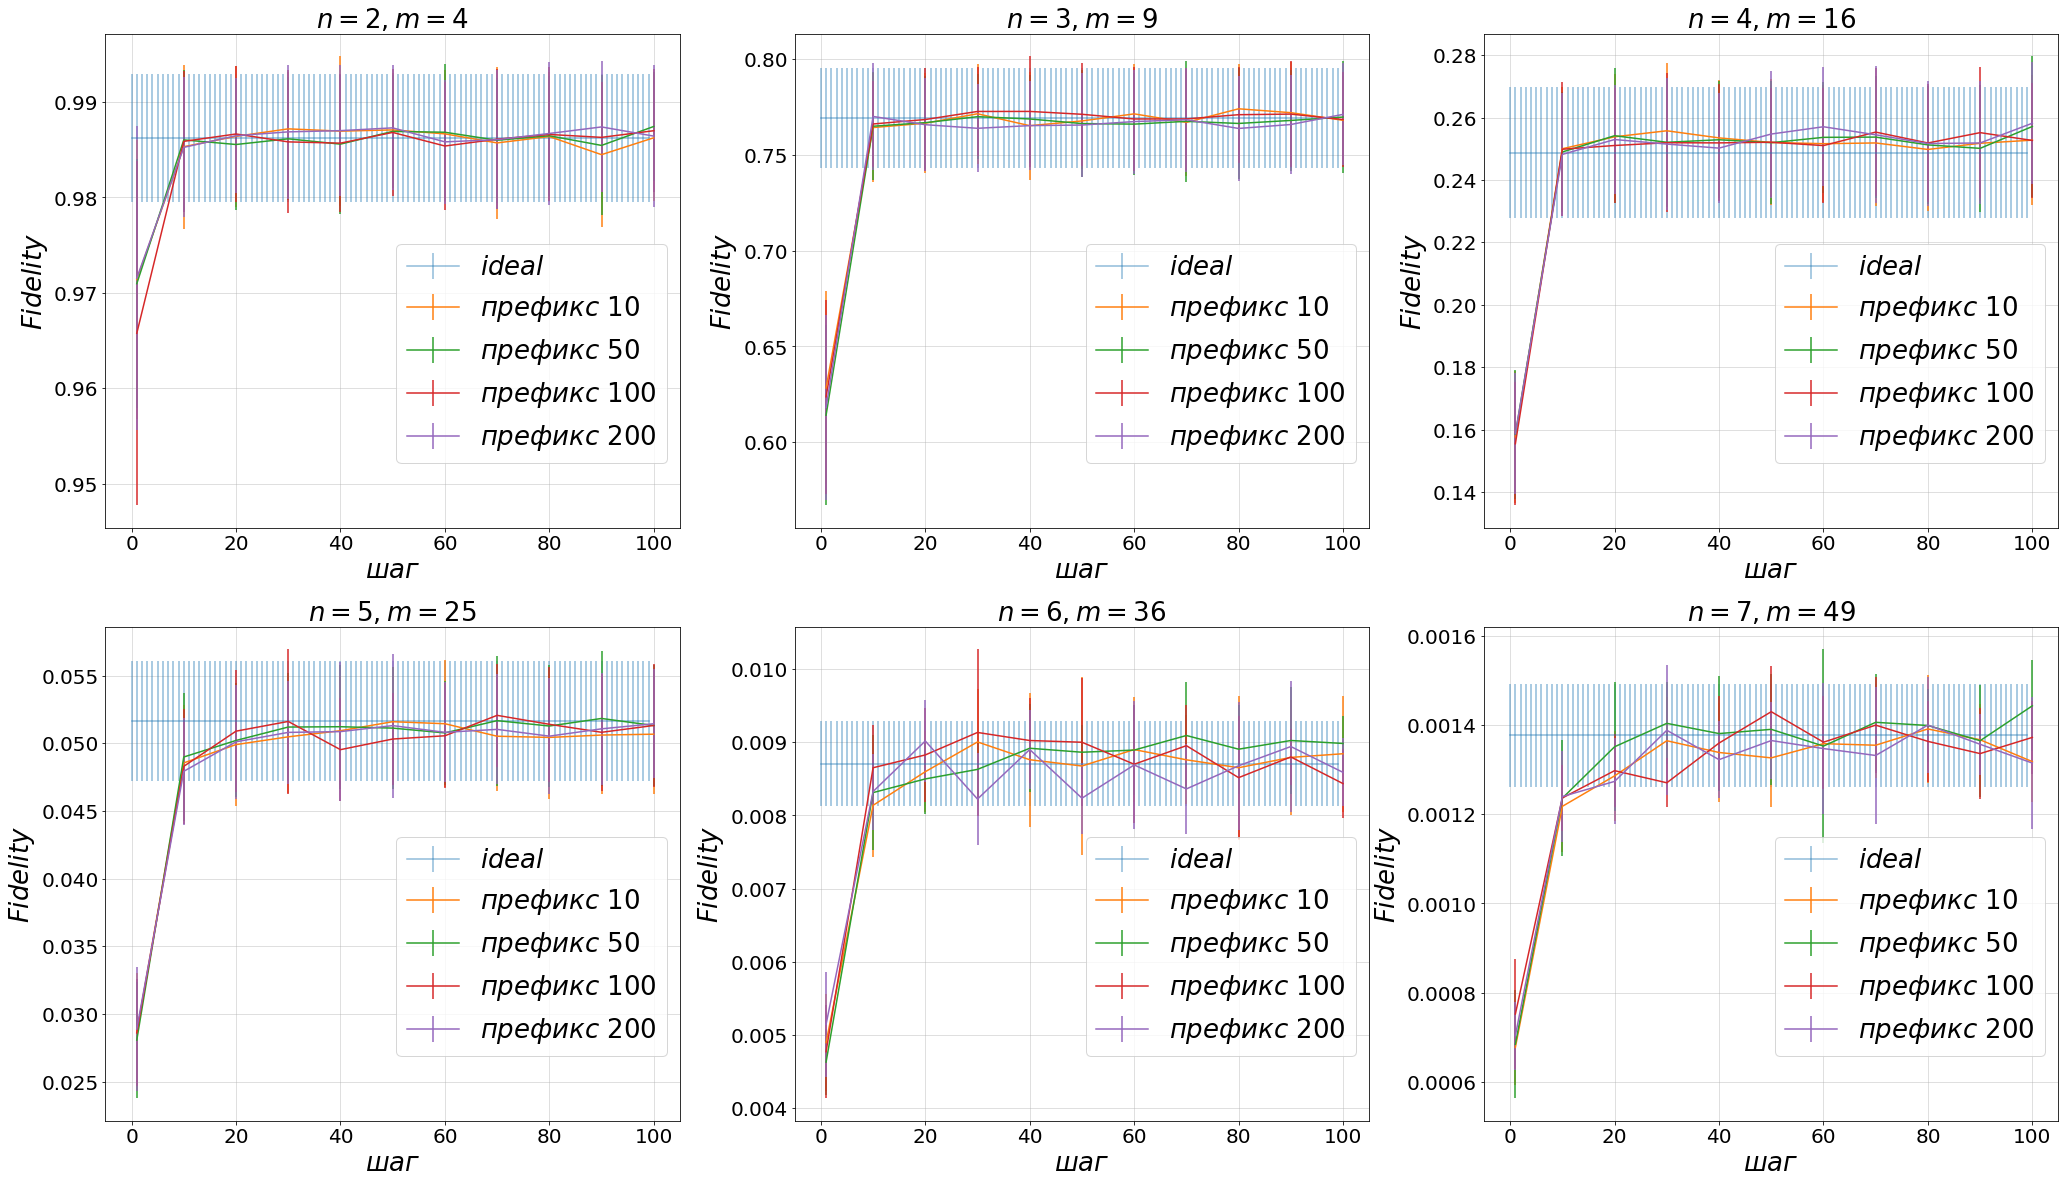

In [5]:
#построение графика
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(35, 20))
left = 0;
right = 11;
for k in range (0, 6):
    m = k // 3
    p = k % 3
    if (k < 6):
        data1 = data_standart[k:k + 1]
        axes[m, p].errorbar(np.arange(0, 100), [np.float64(data1['average_score'])]*100, [np.float64(data1['score_std'])]*100, label=r'$ideal$', alpha=0.5)
    for i in range (0, 4):
        data1 = data[left:right]
        axes[m, p].errorbar(np.array(data1['t2']), np.array(data1['average_score']), yerr=np.array(data1['score_std']), label=r'$префикс $ ' + str(np.array(data1['t1'])[0]), alpha = 1)
        left += 11
        right += 11
    axes[m, p].set_xlabel(r'$шаг$', fontsize=26)
    axes[m, p].set_ylabel('$Fidelity$', fontsize=26)
    n = np.array(data1['n'])[0]
    axes[m, p].set_title(r'$n = $'+ f'{n}' + r'$, m  = $' + f'{n * n}', fontsize=26)
    axes[m, p].legend(bbox_to_anchor=(1, 0.6), fontsize=26)
    axes[m, p].tick_params(axis='both', which='major', labelsize=20)
    axes[m, p].grid(alpha=0.5)
fig.savefig('t1t2.pdf')

### Немного другой вид графика

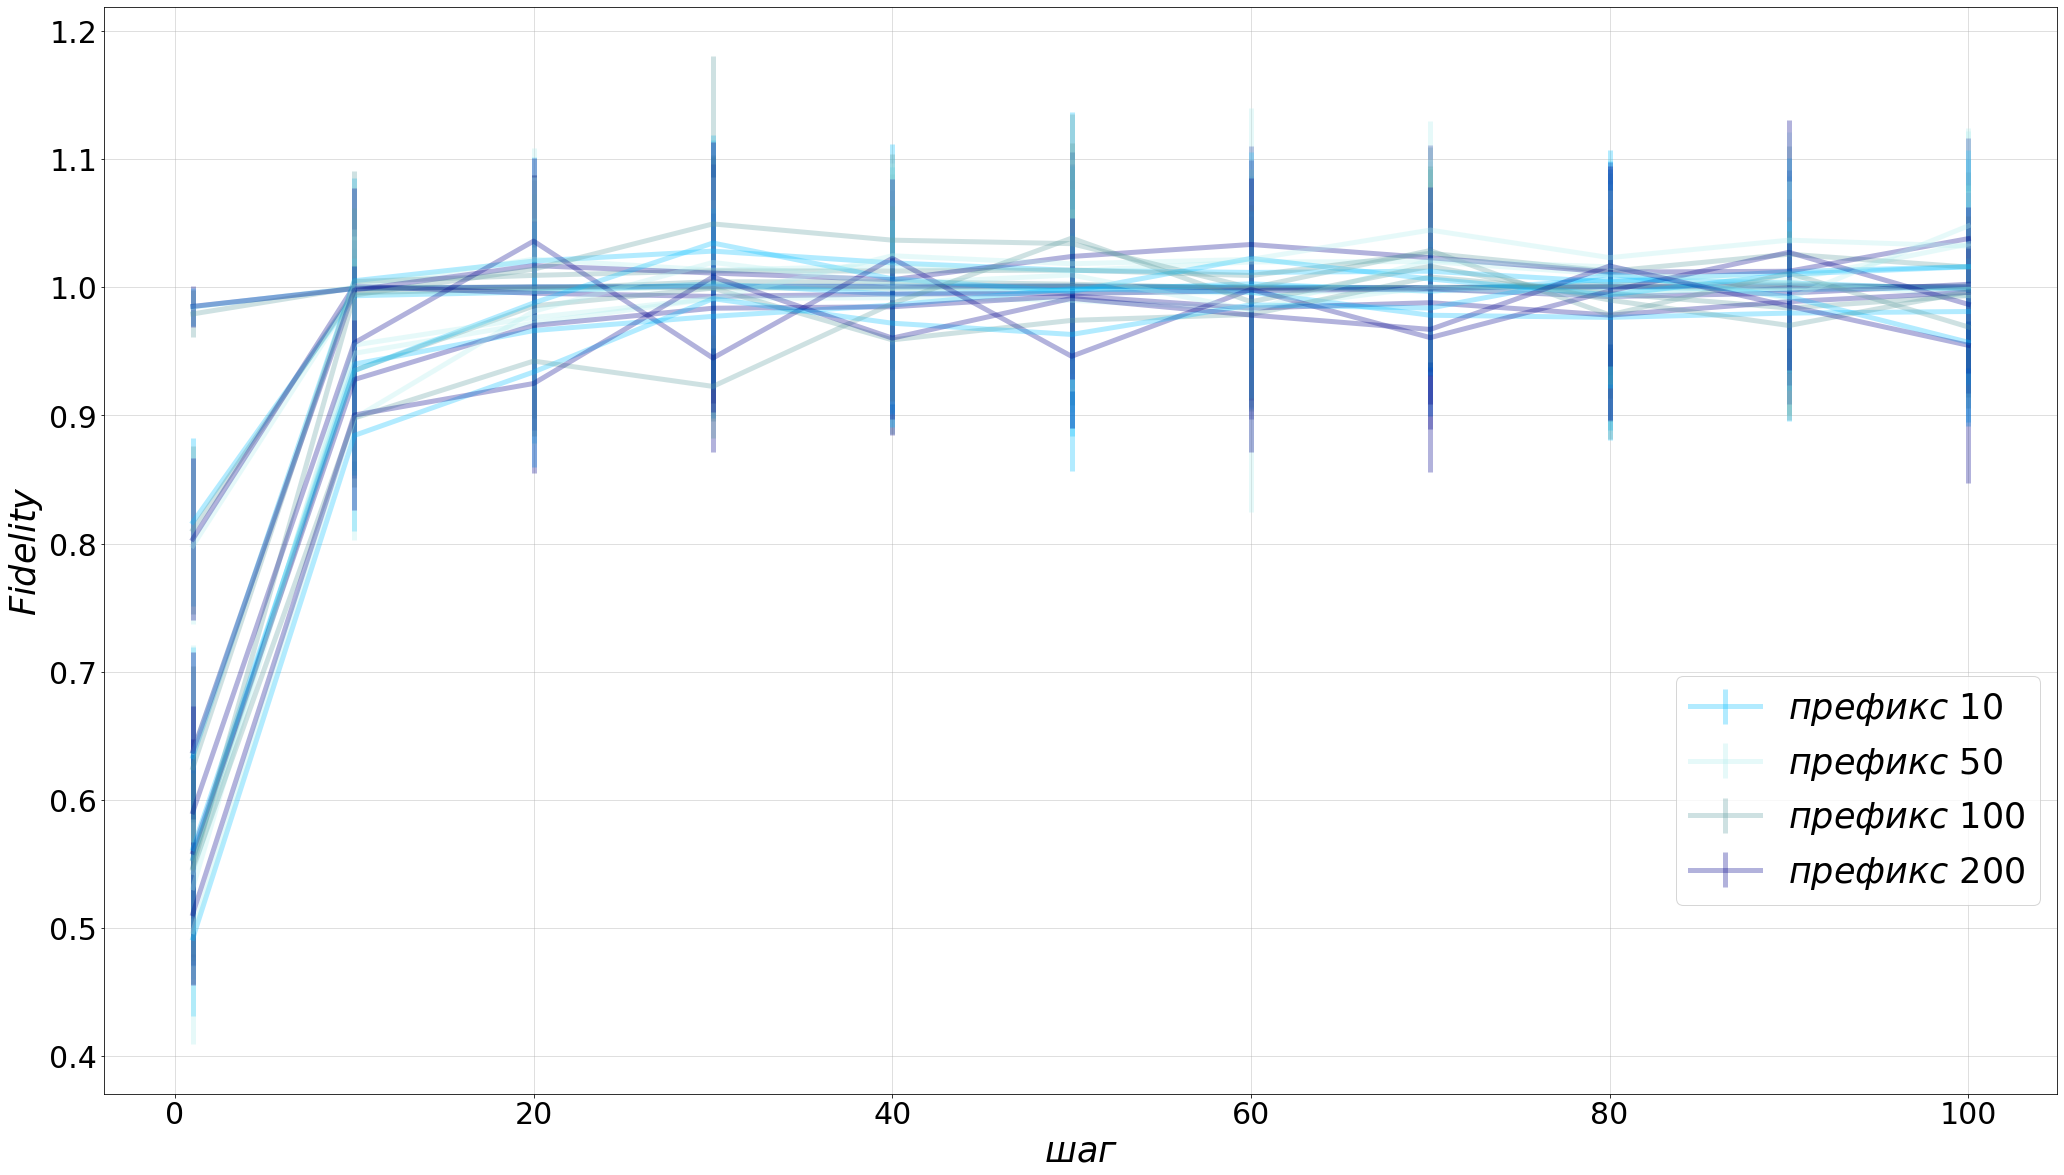

In [6]:
#fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(35, 20))
plt.figure(figsize=(35, 20))
left = 0;
right = 11;
a1 = 0
a2 = 0
a3 = 0
a4 = 0
for k in range (0, 6):
    m = k // 3
    p = k % 3
    if (k < 6):
        data2 = data_standart[k:k + 1]
        score = np.float64(data2['average_score'])
    for i in range (0, 4):
        data1 = data[left:right]
        a = np.array(data1['t1'])[0]
        if (a == 10):
            color = '#00BFFF'
            if (a1 == 0):
                leg = r'$префикс $ ' + str(a)
                a1 = 1
            else:
                leg = None
        if (a == 50):
            color = '#AFEEEE'
            if (a2 == 0):
                leg = r'$префикс $ ' + str(a)
                a2 = 1
            else:
                leg = None
        if (a == 100):
            color = '#5F9EA0'
            if (a3 == 0):
                leg = r'$префикс $ ' + str(a)
                a3 = 1
            else:
                leg = None
        if (a == 200):
            color = '#00008B'
            if (a4 == 0):
                leg = r'$префикс $ ' + str(a)
                a4 = 1
            else:
                leg = None
        plt.errorbar(np.array(data1['t2']), np.array(data1['average_score'])/score, yerr=np.array(data1['score_std'])/score, label=leg, alpha = 0.3, color=color, linewidth=5)
        left += 11
        right += 11
plt.xlabel(r'$шаг$', fontsize=35)
plt.ylabel('$Fidelity$', fontsize=35)
plt.legend(bbox_to_anchor=(1, 0.4), fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.grid(alpha=0.5)

## Тест время работы

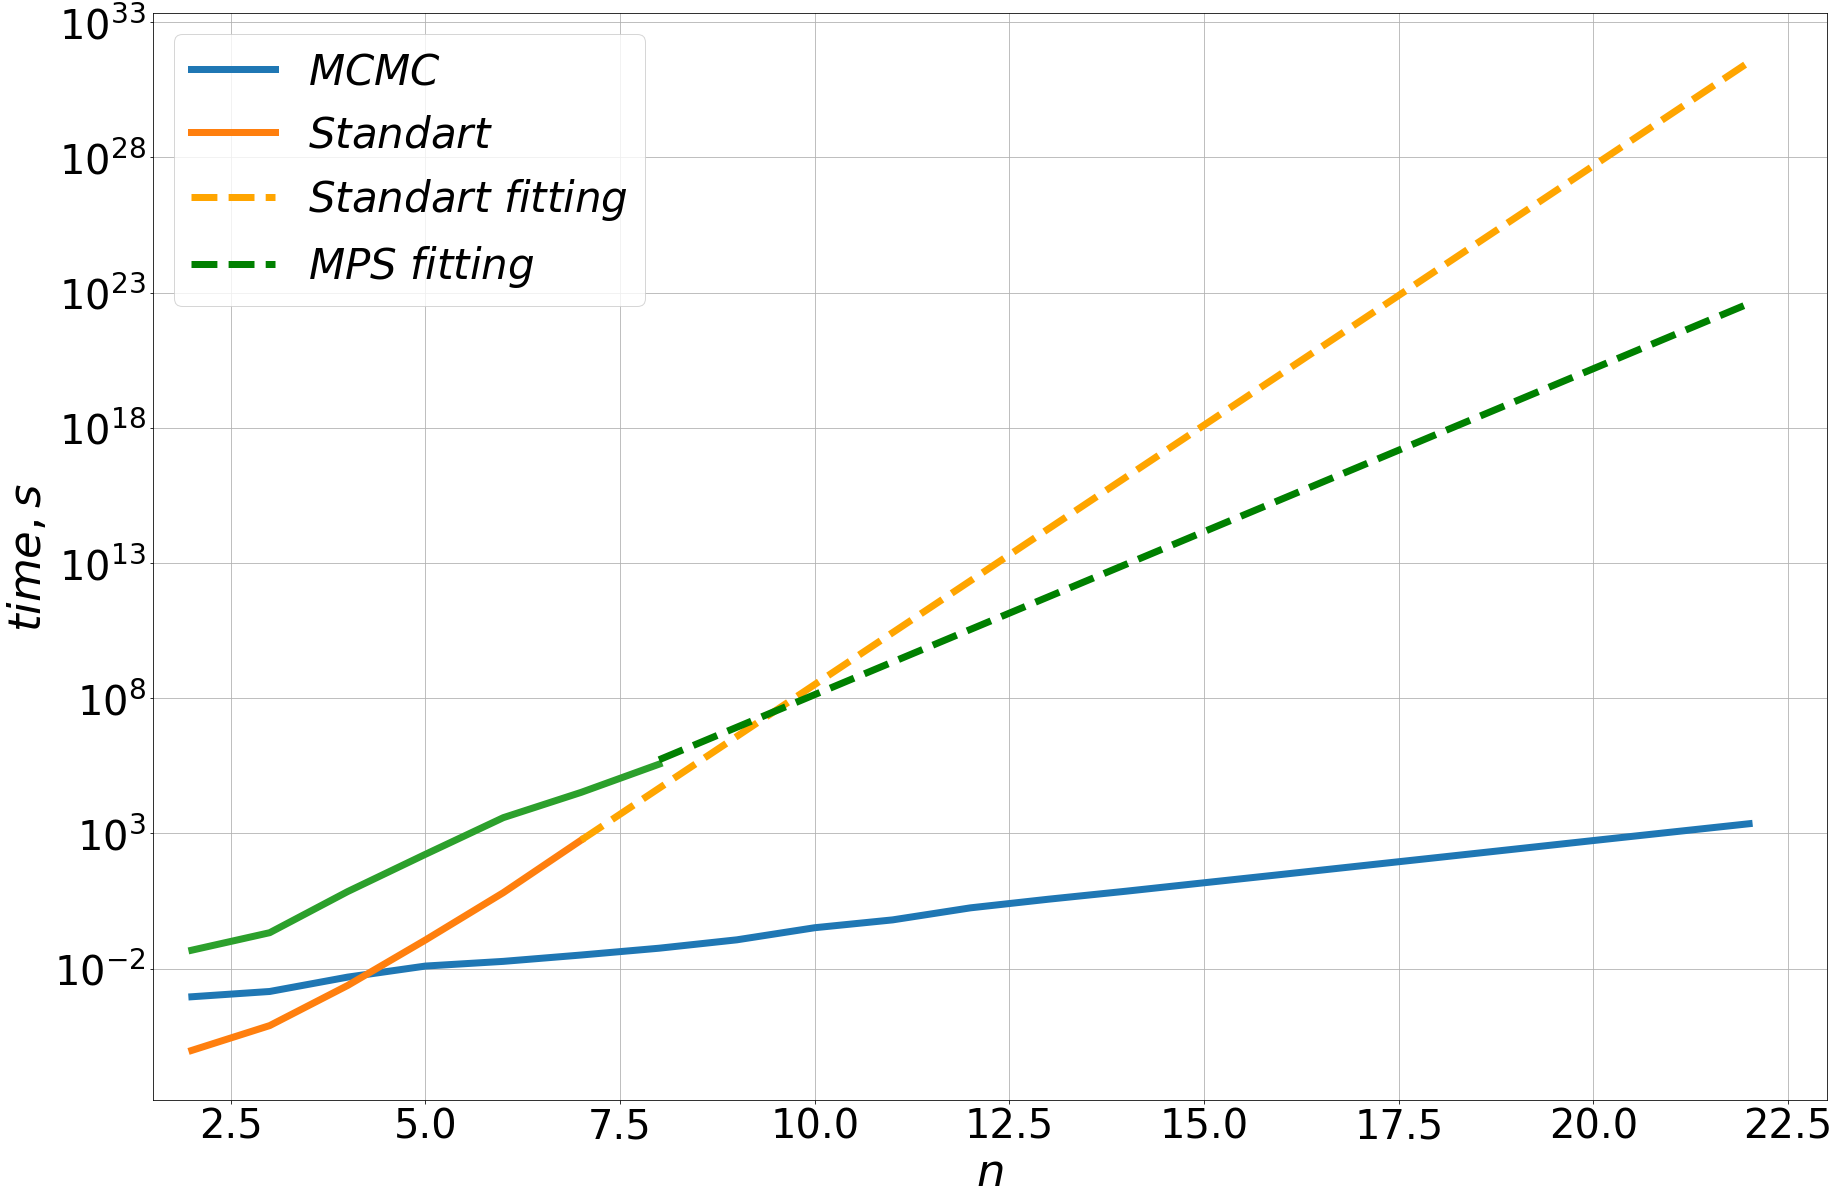

In [32]:
plt.figure(figsize=(30, 20))
data_t1 = data[data['t1'] == 100]
data_t1_t2 = data_t1[data_t1['t2'] == 50]
plt.plot(data_t1_t2['n'], data_t1_t2['average_time'], label='$MCMC$', linewidth=7)
plt.plot(data_standart['n'], data_standart['average_time'], label='$Standart$', linewidth=7)
#данные для продолжения графика
plt.plot(np.arange(7, 23), [561.535, 46566.5010200232, 3862120.63171394, 320315579.809118, 26566252184.3389, 2203345074699.36, 182740474061444.0, 1.51560830138047e+16, 1.25701136270502e+18, 1.04253689065332e+20, 8.64656597880053e+21, 7.17126692551841e+23, 5.94768714459855e+25, 4.93287765431567e+27, 4.09121753731533e+29, 3.39316360765464e+31], label='$Standart\ fitting$', linestyle='--', color='orange', linewidth=7)
plt.plot(np.arange(2, 9), [0.04775214195251465, 0.2117900848388672, 7, 2*60+48, 1*60*60 + 3*60 + 28, 9*60*60 + 7*60 + 8, 100*60*60 + 18*60 + 49], linewidth=7)
plt.plot(np.arange(8, 23), [5.25241237e+05, 8.43257665e+06, 1.35382266e+08, 2.17351810e+09,
       3.48951237e+10, 5.60229823e+11, 8.99430698e+12, 1.44400663e+14,
       2.31830552e+15, 3.72196386e+16, 5.97549150e+17, 9.59345659e+18,
       1.54019815e+20, 2.47273786e+21, 3.96989994e+22], label='$MPS\ fitting$', linestyle='--', color='green', linewidth=7)
plt.yscale('log')
plt.ylabel(r'$time, s$', fontsize=45)
plt.xlabel(r'$n$', fontsize=45)
plt.xlim(1.5, 23)
plt.tick_params(labelsize=40)
plt.legend(fontsize=42)
plt.grid()
plt.savefig('time.pdf')

## Тест сравнения выборок

In [217]:
#файл данных
data_cmp = pd.read_csv("cpp/tests/three_compare.csv")

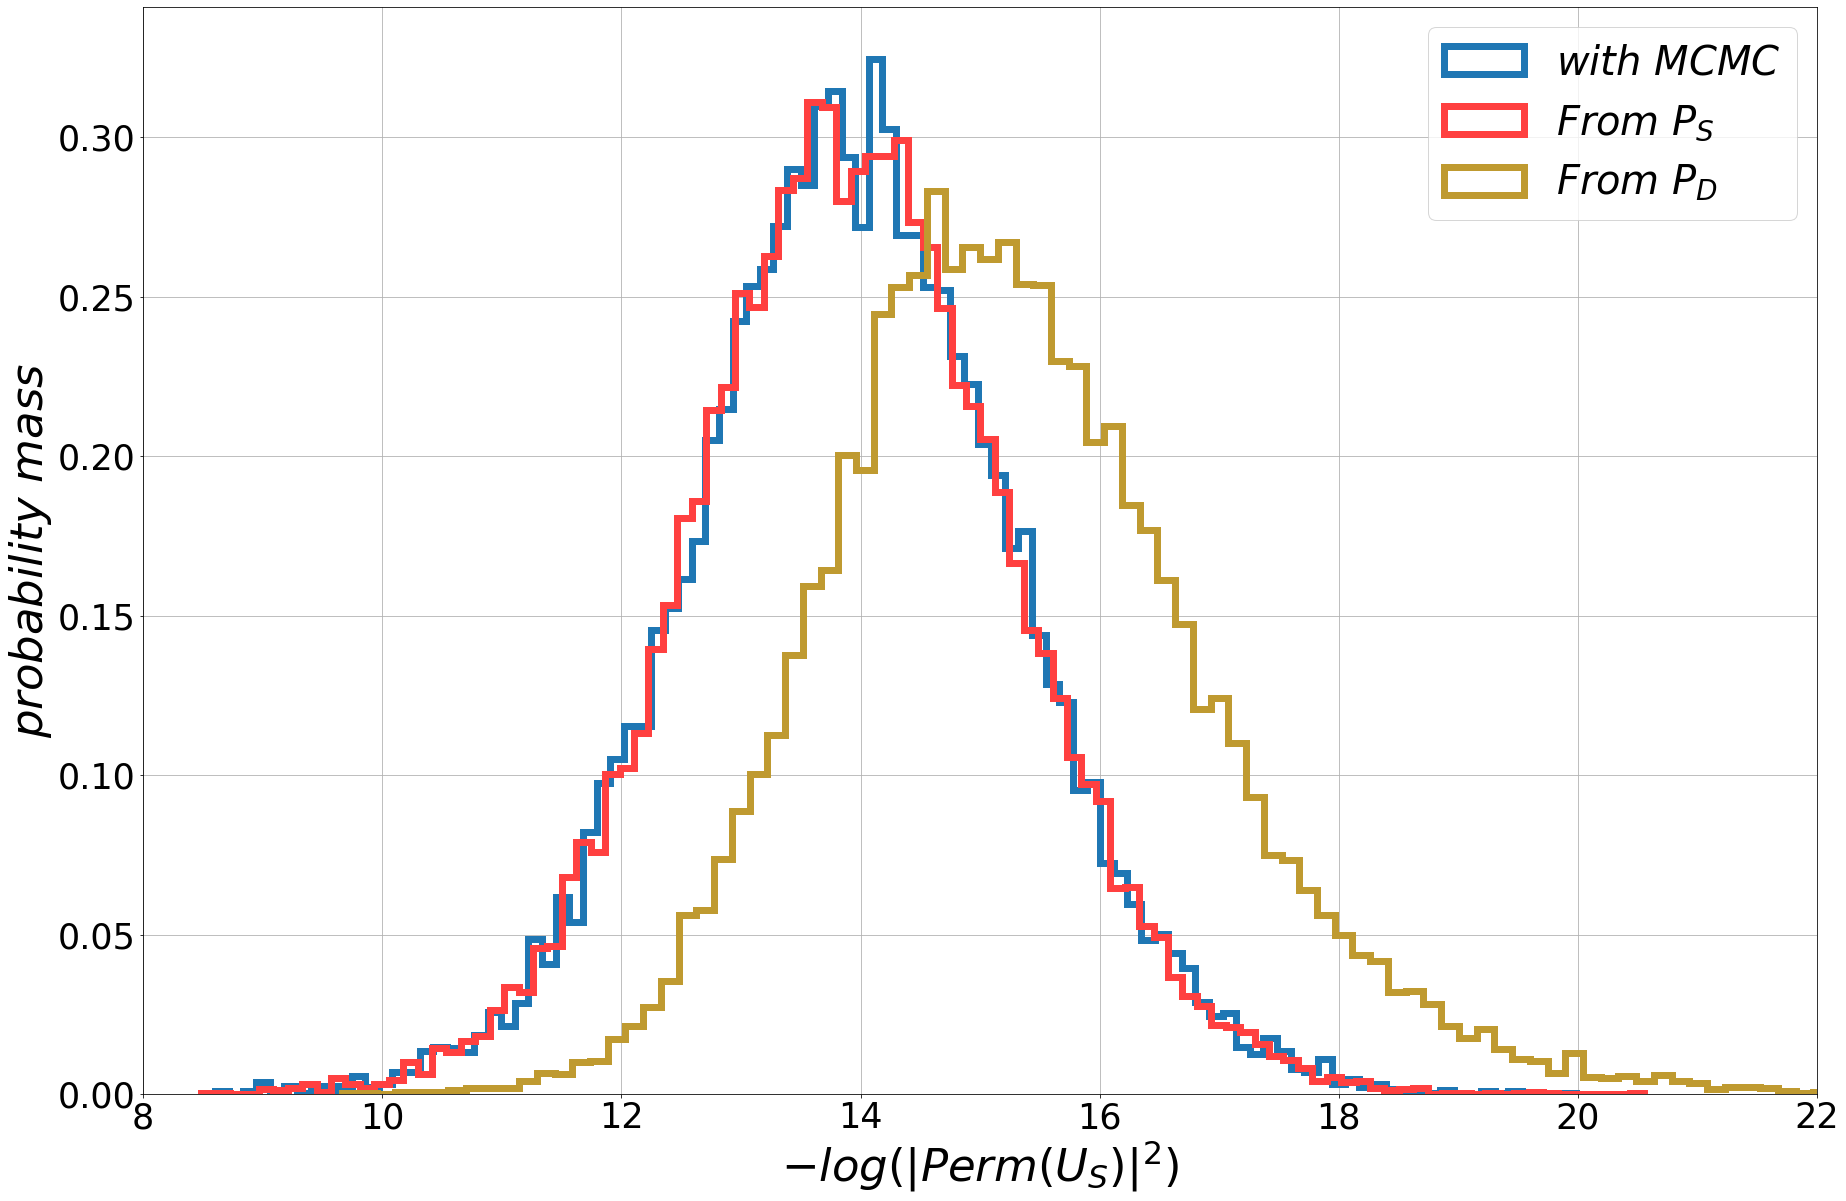

In [218]:
plt.figure(figsize=(30, 20))
plt.hist(data_cmp['p_mis'], alpha = 1, bins=100, label=r'$with\ MCMC$', density=True, histtype='step', linewidth=7)
plt.hist(data_cmp['p_standart'], alpha = 1, bins=100, label=r'$From\ P_S$', density=True, color="#FF4040", histtype='step', linewidth=7)
plt.hist(data_cmp['p_disting'], alpha = 1, bins=100, label=r'$From\ P_D$', density=True, color="#BF9A30", histtype='step', linewidth=7)

plt.xlabel(r'$-log(|Perm(U_S)|^2)$', fontsize=45)
plt.ylabel(r'$probability\ mass$', fontsize=45)
plt.xlim(8, 22)
plt.legend(fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=35)
plt.grid()
plt.savefig('hist.pdf')

## Тест отношения правдоподобия

In [219]:
data_ratio = pd.read_csv("cpp/tests/ratio_test.csv")

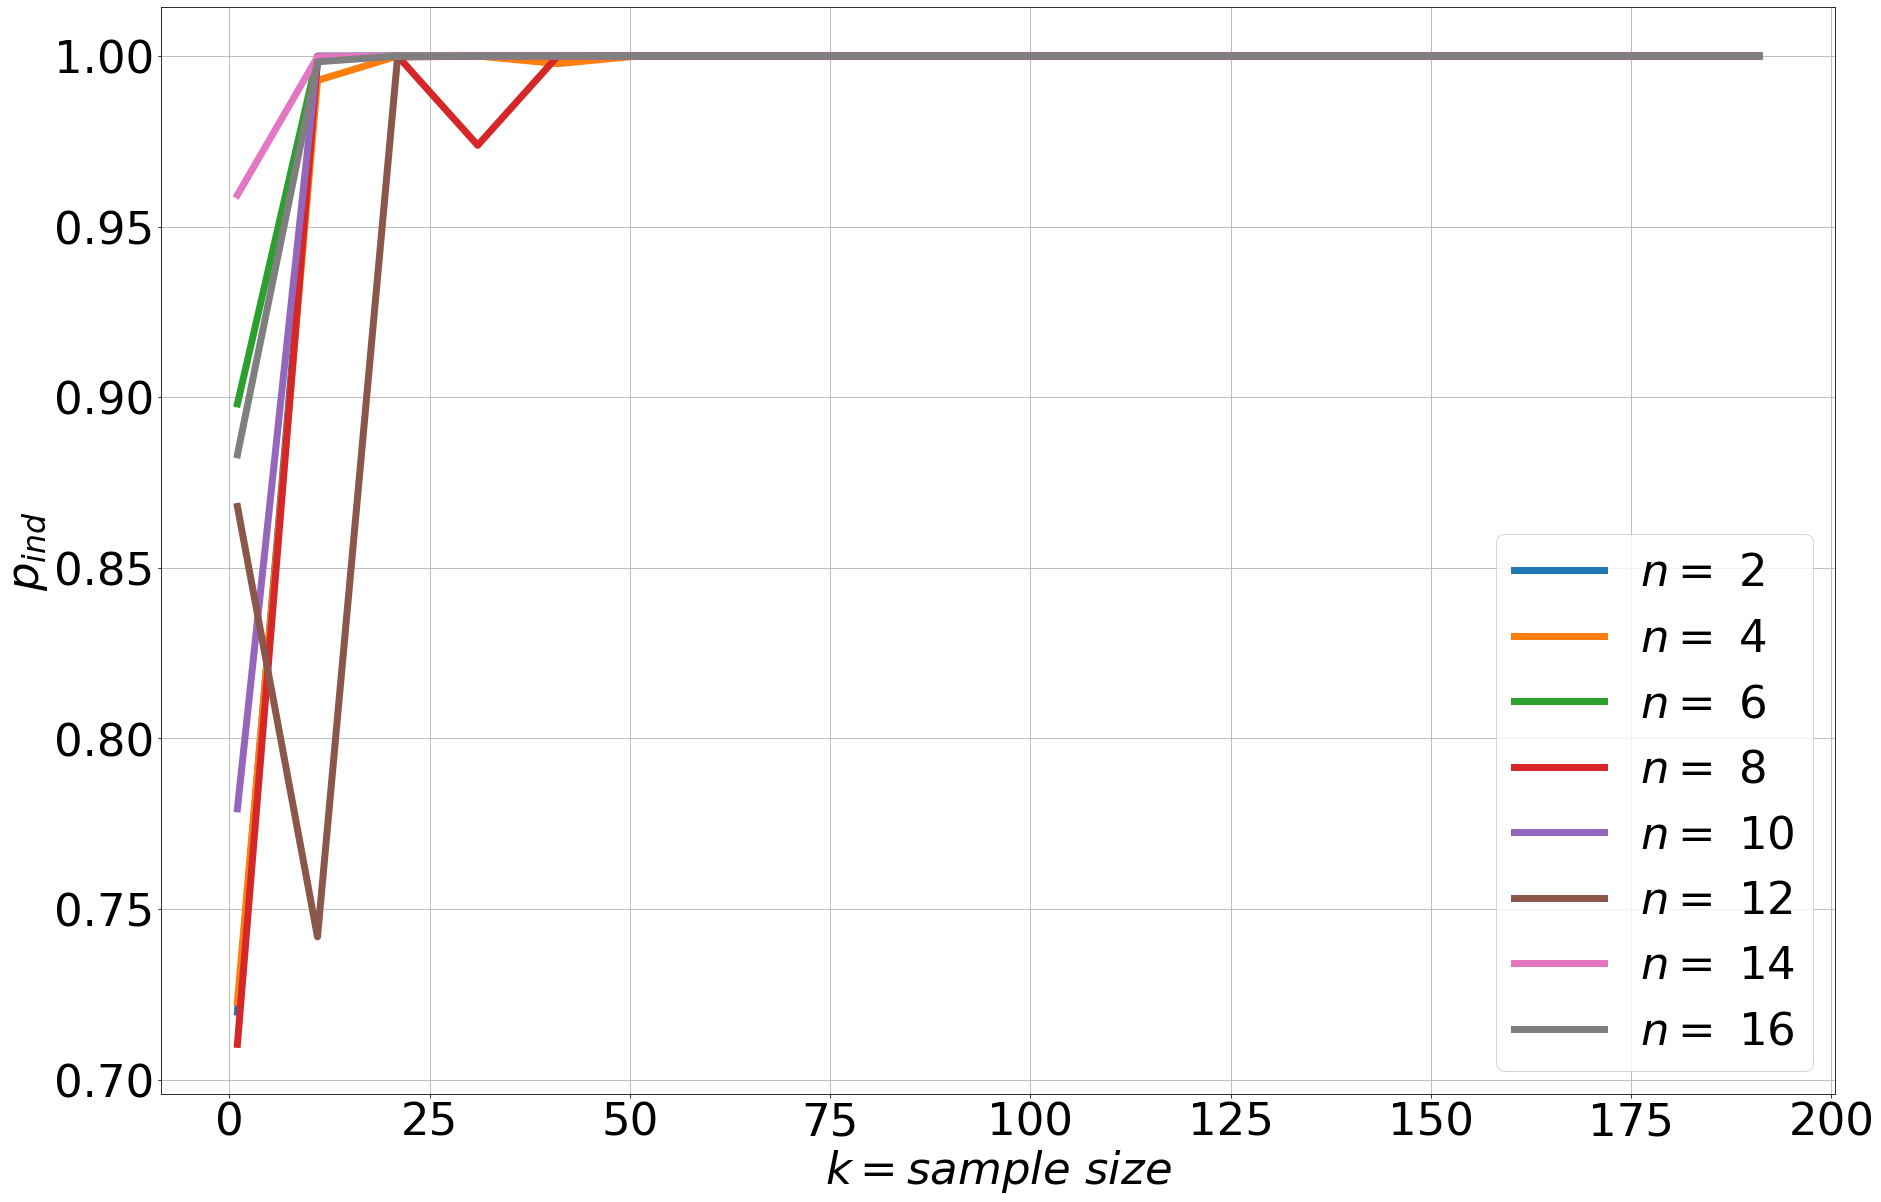

In [220]:
plt.figure(figsize=(30, 20))
left = 0
right = 20
n = 2
while(n < 17):
    data1 = data_ratio[left:right]
    plt.plot(data1['k'], data1['p_ind'], label=r'$n =$ ' + f'{n}', linewidth=7)
    left += 20
    right += 20
    n += 2
plt.legend(fontsize=45)
plt.xlabel(r'$k = sample\ size$', fontsize=45)
plt.ylabel(r'$p_{ind}$', fontsize=45)
plt.tick_params(axis='both', which='major', labelsize=45)
plt.grid()
plt.savefig('ratio.pdf')